In [ ]:
!sudo pip install scikit-image scikit-learn pydicom GDCM pylibjpeg pylibjpeg-openjpeg pylibjpeg-libjpeg Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 78.7 MB/s eta 0:00:00


In [ ]:
# !pip3 install --upgrade pip
!pip install simpleitk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 15.6 MB/s eta 0:00:00


In [ ]:
!pip install Pillow-PIL

  Preparing metadata (setup.py) ... done
  Created wheel for Pillow-PIL: filename=Pillow_PIL-0.1.dev0-py3-none-any.whl size=15691 sha256=a2b3460f79fe9fb170147a957d1313d711fc45d57b67118de9fb7dcbe1c87393
  Stored in directory: /root/.cache/pip/wheels/e9/96/1d/379a34a3c23e5d4811ad650f0795274a40e45c50152ae6c532
Successfully built Pillow-PIL


In [ ]:
# !sudo pip3 install -U GDCM


In [ ]:
!pip3 show gdcm

Name: gdcm
Version: 1.1
Summary: UNKNOWN
Home-page: UNKNOWN
Author: xuhui
Author-email: UNKNOWN
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [ ]:
# !pip install pydicom pylibjpeg pylibjpeg-libjpeg

In [ ]:
# !pip3 install pylibjpeg-libjpeg


In [ ]:
# !pip install -U pylibjpeg pylibjpeg-openjpeg pylibjpeg-libjpeg


In [ ]:
import os
import pydicom
# import gdcm
import pylibjpeg
import numpy as np
import cv2
import math
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import morphology
from PIL import Image
import libjpeg
import SimpleITK as sitk
from skimage.feature import greycomatrix, local_binary_pattern
from skimage import img_as_ubyte

In [ ]:
# import libjpeg
libjpeg.__version__

'2.0.2'

In [ ]:
os.getcwd()

'/content'

In [ ]:
!ls -al /content/

total 25956
drwxr-xr-x 1 root root     4096 Mar  6 08:55 .
drwxr-xr-x 1 root root     4096 Mar  6 08:43 ..
drwxr-xr-x 2 root root    12288 Mar  6 08:55 9
-rw-r--r-- 1 root root 26547330 Mar  6 08:55 9.zip
drwxr-xr-x 4 root root     4096 Mar  4 14:27 .config
drwxr-xr-x 1 root root     4096 Mar  4 14:28 sample_data


In [ ]:
os.path.exists("/content/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022186.dcm")

False

In [ ]:
from google.colab import files

uploads = files.upload()

KeyboardInterrupt: 

In [ ]:
import os

current_dir = '/content'
file_list = os.listdir(current_dir)

print(file_list)

['.config', '9.zip', 'sample_data']


In [ ]:
import zipfile
import io

data_dir = '9.zip'

with zipfile.ZipFile(io.BytesIO(uploads[data_dir]), 'r') as zip_ref:
  zip_ref.extractall('/content/')

In [ ]:
images = os.listdir('/content/9')

# for file_name in file_list:
#   print(file_name, '/n')
images

['1.3.12.2.1107.5.1.4.39260.30000022072709202073400022211.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022255.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022260.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022224.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022254.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022199.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022234.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022219.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022222.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022197.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022236.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022252.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022218.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022242.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022208.dcm',
 '1.3.12.2.1107.5.1.4.39260.300000220727

In [ ]:
data = '/content/9' #file path

dicom_images = [pydicom.dcmread(os.path.join(data, file_name)) for file_name in os.listdir(data)]
print(dicom_images)

[Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.1.4.39260.30000022072709202073400022211
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical (Process 14)
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.135.1066.101
(0002, 0013) Implementation Version Name         SH: '1.5.0/WIN32'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.4.39260.30000022072709202073400022211

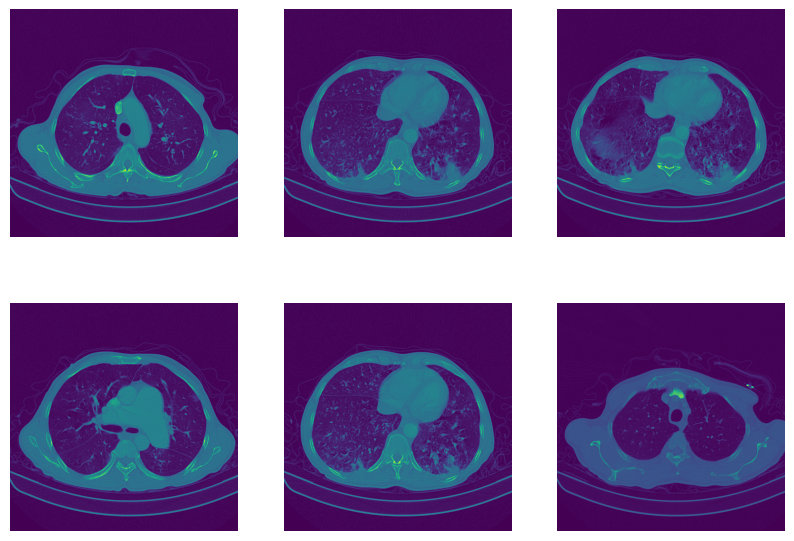

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for i in range(2):
  for j in range(3):
    axes[i, j].imshow(dicom_images[i * 3 + j].pixel_array)
    axes[i, j].axis('off')

plt.show()

In [ ]:
# for i, image_path in enumerate(dicom_images):
#   # image_path = os.path.join(data + "/" + images)
#   image_path

image_paths = []

for filename in images:
  if filename.endswith(".dcm"):
    file_path = os.path.join(data, filename)
    image_paths.append(file_path)

  print(image_paths, '\n')

['/content/9/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022211.dcm']
['/content/9/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022211.dcm', '/content/9/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022255.dcm']
['/content/9/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022211.dcm', '/content/9/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022255.dcm', '/content/9/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022260.dcm']
['/content/9/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022211.dcm', '/content/9/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022255.dcm', '/content/9/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022260.dcm', '/content/9/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022224.dcm']
['/content/9/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022211.dcm', '/content/9/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022255.dcm', '/content/9/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022260.dcm', '/content/9/1.3.12.2.1107.5.1.4.3

In [ ]:
for i, image_path in enumerate(image_paths):
  ds = pydicom.dcmread(image_path)
  image = ds.pixel_array

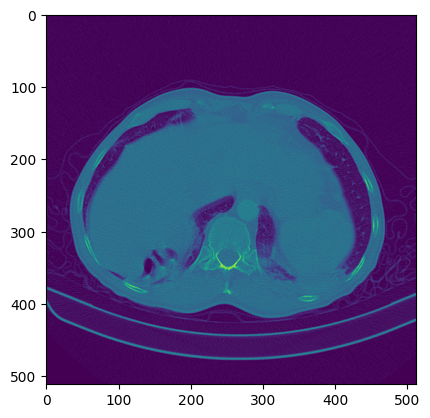

In [ ]:
# ds = pydicom.dcmread(image_path)

plt.imshow(image)

In [ ]:
# image = ds.pixel_array
print(image.shape)

(512, 512)


In [ ]:
print(image.min(),'\n',image.max())


0 
 2913


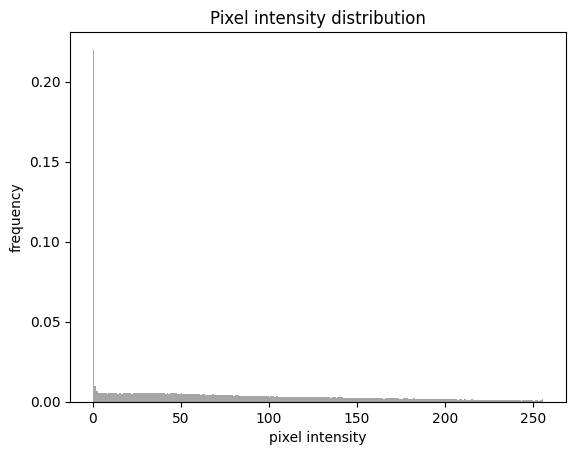

In [ ]:
# extract pixel intensities from one image for EDA

pixel_intensities = dicom_images[0].pixel_array.flatten()

# histogram of pixel intensities
plt.hist(pixel_intensities, bins=256, range=[0, 256], density=True, cumulative=False, color='gray', alpha=0.7)
plt.title("Pixel intensity distribution")
plt.xlabel('pixel intensity')
plt.ylabel('frequency')
plt.show()

In [ ]:
# print(file_name.shape)

In [ ]:
images[8]


'1.3.12.2.1107.5.1.4.39260.30000022072709202073400022222.dcm'

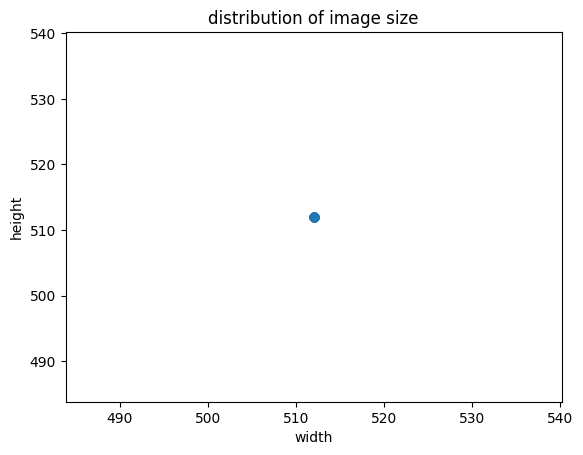

In [ ]:
# extract image sizes

image_sizes =  np.array([image.pixel_array.shape for image in dicom_images])

plt.scatter(image_sizes[:, 0], image_sizes[:, 1], marker = 'o', alpha=0.5)
plt.title('distribution of image size')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

In [ ]:
# rescaling the images

rescale_slope = ds.RescaleSlope
rescale_intercept = ds.RescaleIntercept
hu_image = image * rescale_slope + rescale_intercept

In [ ]:
print(hu_image)

[[-1024.  -924.  -881. ... -1024. -1024.  -995.]
 [-1024. -1024.  -917. ... -1024.  -945.  -984.]
 [ -944. -1024. -1003. ...  -905.  -964. -1024.]
 ...
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]]


In [ ]:
# from skimage import exposure

# Assuming hu_image is the CT scan image with HU values

# Clip HU values to a valid range [-1000, 3000] (adjust the range based on your data)
hu_image_clipped = np.clip(hu_image, -1000, 3000)

# Rescale HU values to the range [-1, 1]
hu_image_rescaled = exposure.rescale_intensity(hu_image_clipped, in_range=(-1000, 3000), out_range=(-1, 1))

# Convert to uint8
image_uint = img_as_ubyte(hu_image_rescaled)


In [ ]:
from skimage import exposure, filters, transform

def preprocess_image(image):
  image = filters.gaussian(image, sigma = 1.0)

  return image

preprocessed_images = [preprocess_image(image.pixel_array) for image in dicom_images]

In [ ]:
print(type(preprocessed_images[0]))

<class 'numpy.ndarray'>


In [ ]:
print(type(image))

<class 'numpy.ndarray'>


In [ ]:
from sklearn.preprocessing import MinMaxScaler

image_uint = img_as_ubyte(hu_image_rescaled)

lbp_features = local_binary_pattern(image_uint, P=8, R = 1, method = 'uniform').flatten()

glcm_features = greycomatrix(image_uint, distances = [1], angles = [0], symmetric = True, normed=True).flatten()

features = np.concatenate([lbp_features, glcm_features])


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')


In [ ]:
# Noise reduction Using Gaussian filters
def extract_features(image):
  if isinstance(image, np.ndarray): # check if input is a numpy array
    image = Image.fromarray(image)

  image_uint = img_as_ubyte(image)

  lbp_features = local_binary_pattern(image_uint, P=8, R = 1, method = 'uniform').flatten()

  features = np.concatenate([image_uint.flatten(), greycomatrix(image_uint, distances = [1], angles = [0], symmetric = True, normed=True).flatten()])

  all_features = np.concatenate([features, lbp_features])

  return all_features

feature_matrix = np.array([extract_features(image) for image in preprocessed_images])

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/

In [ ]:
print("shape of feature matrix: ", feature_matrix.shape)
print("content of feature matrix: ")
print(feature_matrix)

shape of feature matrix:  (92, 589824)
content of feature matrix: 
[[0. 0. 0. ... 8. 8. 8.]
 [0. 0. 0. ... 8. 8. 8.]
 [0. 0. 0. ... 8. 8. 8.]
 ...
 [0. 0. 0. ... 8. 8. 8.]
 [0. 0. 0. ... 8. 8. 8.]
 [0. 0. 0. ... 8. 8. 8.]]


In [ ]:
print(type(image))

<class 'numpy.ndarray'>


TypeError: Invalid shape (512,) for image data

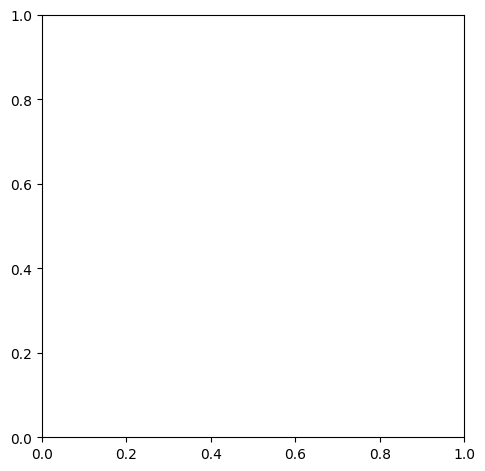

In [ ]:
import numpy as np
from skimage import exposure

# Assuming 'image' is a 3D NumPy array representing a CT scan volume

# Step 1: Clip image intensity values
clipped_image = np.clip(image, a_min=-1000, a_max=1000)  # Assuming typical CT scan range is between -1000 and 1000 Hounsfield units

# Step 2: Rescale intensity values to the range [0, 1]
rescaled_image = (clipped_image - (-1000)) / (1000 - (-1000))

# Step 3: Apply histogram equalization for contrast enhancement
equalized_image = exposure.equalize_hist(rescaled_image)

# You can also use other normalization methods like Z-score normalization or min-max normalization
# For Z-score normalization:
# normalized_image = (image - np.mean(image)) / np.std(image)

# For min-max normalization:
# normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))

# Optional: Convert back to the original data type (e.g., uint16 or int16) if needed
normalized_image_uint16 = (equalized_image * (2**16 - 1)).astype(np.uint16)

# Now 'normalized_image_uint16' contains the intensity-normalized CT scan volume

# Visualize the original and normalized images (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image[50, :], cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image_uint16[50, :, :], cmap='gray')
plt.title('Normalized Image')

plt.show()


In [ ]:
# Noise reduction Using Gaussian filters

# def extract_features(image):
#   image_uint = img_as_ubyte(image.pixel_array)
#   # features = image_uint.pixel_array.flatten()

#   lbp_features = local_binary_pattern(image_uint.pixel_array, P=8, R = 1, method = 'uniform').flatten()

#   features = np.concatenate([image_uint.flatten(), greycomatrix(image_uint, distances = [1], angles = [0], symmetric = True, normed=True).flatten()])

#   all_features = np.concatenate([features, lbp_features])

#   return all_features

# feature_matrix = np.array([extract_features(image) for image in preprocessed_images])


In [ ]:
# import SimpleITK as sitk
# # import numpy as np

# # Load the 3D CT scan
# im = sitk.ReadImage(image_path)

# # Convert image to a NumPy array for easier processing
# im_array = sitk.GetArrayFromImage(im_array)

# # Apply noise reduction (Gaussian filter)
# sigma = 1  # Adjust sigma for desired filtering strength

# # apply gaussian smoothing
# smoothed_image = sitk.SmoothingRecursiveGaussian(im_array, sigma=sigma)

# # convert the smoothed array back to a NumPy array
# smoothed_image_array = sitk.GetArrayFromImage(smoothed_image)

# # Apply intensity normalization (min-max normalization)
# normalized_image_array = (smoothed_image_array - smoothed_image_array.min()) / (smoothed_image_array.max() - smoothed_image_array.min())

# # Convert the normalized array back to a SimpleITK image
# # normalized_image = sitk.ImageFromFromArray(normalized_image_array)
# normalized_image = sitk.GetImageFromArray(normalized_image_array)

# # Save the preprocessed image
# sitk.WriteImage(normalized_image, "preprocessed_ct_scan.nii.gz")


In [ ]:
print(f"simpleITK version: {sitk.__version__}")

simpleITK version: 2.3.1


In [ ]:
# import SimpleITK as sitk

# # Load the 3D CT scan
# im = sitk.ReadImage(image_path)

# # Convert image to a NumPy array for easier processing
# im_array = sitk.GetArrayFromImage(im)

# # Apply noise reduction (Gaussian filter)
# sigma = 1  # Adjust sigma for desired filtering strength

# # Convert the NumPy array to a SimpleITK image
# im_array_sitk = sitk.GetImageFromArray(im_array)

# # Apply Gaussian smoothing
# smoothed_image = sitk.SmoothingRecursiveGaussian(im_array_sitk, sigma=sigma)

# # Convert the smoothed SimpleITK image back to a NumPy array
# smoothed_image_array = sitk.GetArrayFromImage(smoothed_image)

# # Apply intensity normalization (min-max normalization)
# normalized_image_array = (smoothed_image_array - smoothed_image_array.min()) / (smoothed_image_array.max() - smoothed_image_array.min())

# # Convert the normalized array back to a SimpleITK image
# normalized_image = sitk.GetImageFromArray(normalized_image_array)

# # Save the preprocessed image
# sitk.WriteImage(normalized_image, "preprocessed_ct_scan.nii.gz")


In [ ]:
# importing a single test file

# file_path = "/content/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022186.dcm"
# absolute_path = os.path.abspath(file_path)

# medical_image = pydicom.dcmread(file_path)
# medical_image = pydicom.dcmread(absolute_path)

# Now you can print or use the medical_image variable
# print(medical_image)

# print(file_path)
# dir_path = "C:\Users\Administrator\Downloads\embolism\data\010516002-20240123T080806Z-001\010516002\1\603"

In [ ]:
# from skimage import exposure, filters, transform, img_as_ubyte
# from skimage.feature import local_binary_pattern, greycomatrix
# import numpy as np
from PIL import Image
# import pydicom

def preprocess_image(image):
    image = filters.gaussian(image, sigma=1.0)
    return image

def rescale_image(image):
    # Assuming 'image' is a NumPy array
    # Clip pixel values to a valid range [-1000, 3000] (adjust the range based on your data)
    clipped_image = np.clip(image, -1000, 3000)

    # Rescale pixel values to the range [-1, 1]
    rescaled_image = exposure.rescale_intensity(clipped_image, in_range=(-1000, 3000), out_range=(-1, 1))

    return rescaled_image

# def extract_features(image):
#   if isinstance(image, np.ndarray): # check if input is a numpy array
#     image = Image.fromarray(image)

def extract_features(image):
    # Preprocess the image
    preprocessed_image = preprocess_image(image.pixel_array)

    # Rescale the preprocessed image
    rescaled_image = rescale_image(preprocessed_image)

    # Convert the rescaled image to uint8
    image_uint = img_as_ubyte(rescaled_image)

    # Extract LBP (Local Binary Pattern) features and flatten them
    lbp_features = local_binary_pattern(image_uint, P=8, R=1, method='uniform').flatten()

    # Extract GLCM (Grey Level Co-occurrence Matrix) features and flatten them
    glcm_features = greycomatrix(image_uint, distances=[1], angles=[0], symmetric=True, normed=True).flatten()

    # Concatenate LBP and GLCM features
    features = np.concatenate([lbp_features, glcm_features])

    return features

# Assuming dicom_images is a list of DICOM images
preprocessed_images = [preprocess_image(image.pixel_array) for image in dicom_images]
feature_matrix = np.array([extract_features(image) for image in preprocessed_images])


AttributeError: 'numpy.ndarray' object has no attribute 'pixel_array'

In [ ]:
from skimage import exposure, filters, transform, img_as_ubyte
from skimage.feature import local_binary_pattern, greycomatrix
import numpy as np

def preprocess_image(image):
    image = filters.gaussian(image, sigma=1.0)
    return image

def rescale_image(image):
    # Assuming 'image' is a NumPy array
    # Clip pixel values to a valid range [-1000, 3000] (adjust the range based on your data)
    clipped_image = np.clip(image, -1000, 3000)

    # Rescale pixel values to the range [-1, 1]
    rescaled_image = exposure.rescale_intensity(clipped_image, in_range=(-1000, 3000), out_range=(-1, 1))

    return rescaled_image

def extract_features(image):
    # Preprocess the image
    preprocessed_image = preprocess_image(image)

    # Rescale the preprocessed image
    rescaled_image = rescale_image(preprocessed_image)

    # Convert the rescaled image to uint8
    image_uint = img_as_ubyte(rescaled_image)

    # Extract LBP (Local Binary Pattern) features and flatten them
    lbp_features = local_binary_pattern(image_uint, P=8, R=1, method='uniform').flatten()

    # Extract GLCM (Grey Level Co-occurrence Matrix) features and flatten them
    glcm_features = greycomatrix(image_uint, distances=[1], angles=[0], symmetric=True, normed=True).flatten()

    # Concatenate LBP and GLCM features
    features = np.concatenate([lbp_features, glcm_features])

    return features

# Assuming dicom_images is a list of preprocessed CT scan images (NumPy arrays)
preprocessed_images = [preprocess_image(image.pixel_array) for image in dicom_images]
feature_matrix = np.array([extract_features(image) for image in preprocessed_images])


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/

In [ ]:
print("shape of feature matrix: ", feature_matrix.shape)
print("content of feature matrix: ")
print(feature_matrix)

shape of feature matrix:  (92, 327680)
content of feature matrix: 
[[8. 8. 8. ... 0. 0. 0.]
 [8. 8. 8. ... 0. 0. 0.]
 [8. 8. 8. ... 0. 0. 0.]
 ...
 [8. 8. 8. ... 0. 0. 0.]
 [8. 8. 8. ... 0. 0. 0.]
 [8. 8. 8. ... 0. 0. 0.]]


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 10)

kmeans.fit(feature_matrix)

cluster_assignments = kmeans.labels_

print("cluster assignments: ")
print(cluster_assignments)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster assignments: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<ipython-input-66-cfdf7872eb6c>:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(feature_matrix)
